In [1]:
from stable_baselines3 import PPO

from snake.environment.game_environment import SnakeEnvCoilReset
from evaluation.evaluation import get_performance
from snake.visualisation.state_visualisation import visualise_game_state

In [2]:
import os

pwd = os.getcwd()

model = PPO.load(os.path.join(pwd, "..", "ppo_256_128_1m"))

In [74]:
np.empty(0)

array([], dtype=float64)

In [128]:
actions = np.empty((0, 1))
observations = np.empty((0, 100))
rewards = np.empty((0, 1))
dones = np.empty(0, dtype=bool)  # Ensure `dones` is initialized as a boolean array

for i in range(10):
    start_time = time.time()
    
    _actions, _observations, _rewards, _dones = get_performance(
        deeper_256_128_model, SnakeEnvCoilReset(), num_points=10000
    )
    

    actions = np.vstack((actions, _actions))
    observations = np.vstack((observations, _observations))
    rewards = np.vstack((rewards, _rewards))
    dones = np.append(dones, _dones)

    print(time.time() - start_time)
    
# Store the filtered data in a dictionary
data = {
    "actions": actions,
    "observations": observations,
    "rewards": rewards,
    "dones": dones,
}


37.39661121368408
39.49356293678284
38.875295877456665
47.61787390708923
38.416388273239136
49.8788161277771
62.512714862823486
45.0205659866333
35.509151220321655
35.34224009513855


In [110]:
actions = np.empty((0, 1))
observations = np.empty((0, 100))
rewards = np.empty((0, 1))
dones = np.empty(0, dtype=bool)  # Ensure `dones` is initialized as a boolean array

for i in range(10):
    start_time = time.time()
    
    _actions, _observations, _rewards, _dones = get_performance(
        deeper_256_128_model, SnakeEnvCoilReset(), num_points=10000
    )
    
    # Filter for rewards > 0
    mask = _rewards.flatten() > 0  # Flatten to ensure 1D mask
    filtered_actions = _actions[mask]
    filtered_observations = _observations[mask]
    filtered_rewards = _rewards[mask]
    filtered_dones = _dones[mask]

    # Append filtered data from the current iteration
    actions = np.vstack((actions, filtered_actions))
    observations = np.vstack((observations, filtered_observations))
    rewards = np.vstack((rewards, filtered_rewards))
    dones = np.append(dones, filtered_dones)

    print(time.time() - start_time)
    
# Store the filtered data in a dictionary
data = {
    "actions": actions,
    "observations": observations,
    "rewards": rewards,
    "dones": dones,
}


43.078953981399536
43.69701313972473
35.7840838432312
47.62220907211304
47.3359739780426
35.53070282936096
35.553277254104614
35.813271045684814
35.68883013725281
35.51115798950195


In [129]:
from imitation.algorithms.bc import BC
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym
import numpy as np
from imitation.data.types import Transitions


# Step 1: Prepare expert data
expert_transitions = Transitions(
    obs=data["observations"],
    acts=data["actions"],
    dones=data["dones"],
    infos=np.empty((len(data["actions"]))),
    next_obs=np.roll(data["observations"], -1, axis=0)
)
    
def make_env():
    return SnakeEnvCoilReset()
    
# Step 2: Create a simple environment
env = DummyVecEnv([lambda: make_env()])

# Step 3: Initialize the policy
policy_kwargs = dict(
    features_extractor_class=CustomFlattenExtractor,
    net_arch=[256, 128],  # Specify the layer sizes here
)

policy = PPO(policy="MlpPolicy", 
            env=env, 
            policy_kwargs=policy_kwargs, 
            learning_rate=0.0001, 
            batch_size=32,
            )

# Step 4: Initialize the Behavioral Cloning class
bc_trainer = BC(
    observation_space=policy.observation_space,
    action_space=policy.action_space,
    policy=policy.policy,
    demonstrations=expert_transitions,
    rng=np.random.default_rng(),
)

# Step 5: Train the BC policy
bc_trainer.train(
    n_epochs=20
)



0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.0011  |
|    entropy        | 1.1      |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 769      |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.334    |
|    samples_so_far | 32       |
--------------------------------


495batch [00:04, 138.46batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 783      |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.332    |
|    samples_so_far | 16032    |
--------------------------------


987batch [00:07, 169.07batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 1000     |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 791      |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.347    |
|    samples_so_far | 32032    |
--------------------------------


1490batch [00:10, 154.88batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 1500     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 803      |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 48032    |
--------------------------------


2000batch [00:14, 166.65batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 2000     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 812      |
|    loss           | 1.02     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.364    |
|    samples_so_far | 64032    |
--------------------------------


2485batch [00:17, 159.50batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 2500     |
|    ent_loss       | -0.00105 |
|    entropy        | 1.05     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 822      |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.342    |
|    samples_so_far | 80032    |
--------------------------------


2988batch [00:21, 96.14batch/s] 

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 3000     |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 829      |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.345    |
|    samples_so_far | 96032    |
--------------------------------


3113batch [00:22, 118.95batch/s]
3497batch [00:25, 151.07batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 3500     |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 840      |
|    loss           | 1.13     |
|    neglogp        | 1.13     |
|    prob_true_act  | 0.338    |
|    samples_so_far | 112032   |
--------------------------------


3994batch [00:28, 159.35batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 4000     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 849      |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.348    |
|    samples_so_far | 128032   |
--------------------------------


4489batch [00:31, 160.10batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 4500     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 862      |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.352    |
|    samples_so_far | 144032   |
--------------------------------


4994batch [00:34, 158.08batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 5000     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 873      |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 160032   |
--------------------------------


5495batch [00:38, 145.02batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 5500     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 884      |
|    loss           | 1.04     |
|    neglogp        | 1.04     |
|    prob_true_act  | 0.36     |
|    samples_so_far | 176032   |
--------------------------------


5997batch [00:41, 158.40batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 6000     |
|    ent_loss       | -0.00105 |
|    entropy        | 1.05     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 894      |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 192032   |
--------------------------------


6247batch [00:42, 158.64batch/s]
6498batch [00:44, 162.18batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 6500     |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 903      |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 208032   |
--------------------------------


6988batch [00:47, 162.49batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 7000     |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 912      |
|    loss           | 1.01     |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.369    |
|    samples_so_far | 224032   |
--------------------------------


7488batch [00:50, 159.42batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 7500     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 924      |
|    loss           | 1.09     |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.344    |
|    samples_so_far | 240032   |
--------------------------------


7996batch [00:53, 161.56batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 8000     |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 931      |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.361    |
|    samples_so_far | 256032   |
--------------------------------


8498batch [00:56, 160.62batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 8500     |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 939      |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.347    |
|    samples_so_far | 272032   |
--------------------------------


8999batch [01:00, 159.21batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 9000     |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 947      |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.355    |
|    samples_so_far | 288032   |
--------------------------------


9364batch [01:02, 162.29batch/s]
9497batch [01:03, 155.00batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 9500     |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 953      |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.349    |
|    samples_so_far | 304032   |
--------------------------------


9997batch [01:06, 163.16batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 10000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 962      |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.365    |
|    samples_so_far | 320032   |
--------------------------------


10487batch [01:09, 160.55batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 10500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 970      |
|    loss           | 1.01     |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.373    |
|    samples_so_far | 336032   |
--------------------------------


10992batch [01:12, 163.45batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 11000    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 979      |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.341    |
|    samples_so_far | 352032   |
--------------------------------


11496batch [01:15, 163.36batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 11500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 987      |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.36     |
|    samples_so_far | 368032   |
--------------------------------


11997batch [01:19, 157.07batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 12000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 996      |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.348    |
|    samples_so_far | 384032   |
--------------------------------


12484batch [01:22, 163.58batch/s]
Epoch 3 of 20                    

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 12500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1e+03    |
|    loss           | 1.01     |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.37     |
|    samples_so_far | 400032   |
--------------------------------


12991batch [01:25, 163.33batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 13000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.01e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 416032   |
--------------------------------


13492batch [01:28, 156.25batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 13500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.02e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 432032   |
--------------------------------


13990batch [01:31, 159.58batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 14000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.03e+03 |
|    loss           | 1.13     |
|    neglogp        | 1.13     |
|    prob_true_act  | 0.333    |
|    samples_so_far | 448032   |
--------------------------------


14492batch [01:34, 160.25batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 14500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.04e+03 |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.348    |
|    samples_so_far | 464032   |
--------------------------------


14990batch [01:37, 162.93batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 15000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.05e+03 |
|    loss           | 1        |
|    neglogp        | 1        |
|    prob_true_act  | 0.372    |
|    samples_so_far | 480032   |
--------------------------------


15499batch [01:41, 137.69batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 15500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 1.06e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.352    |
|    samples_so_far | 496032   |
--------------------------------


15621batch [01:43, 84.56batch/s] 
15990batch [01:50, 128.44batch/s][A

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 16000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.06e+03 |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.361    |
|    samples_so_far | 512032   |
--------------------------------


16492batch [01:54, 140.25batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 16500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.07e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.358    |
|    samples_so_far | 528032   |
--------------------------------


16996batch [01:57, 151.55batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 17000    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.08e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.354    |
|    samples_so_far | 544032   |
--------------------------------


17500batch [02:01, 121.56batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 17500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.09e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 560032   |
--------------------------------


17988batch [02:05, 119.11batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 18000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.1e+03  |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.346    |
|    samples_so_far | 576032   |
--------------------------------


18491batch [02:09, 128.70batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 18500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 5        |
|    l2_loss        | 0        |
|    l2_norm        | 1.1e+03  |
|    loss           | 1.04     |
|    neglogp        | 1.04     |
|    prob_true_act  | 0.362    |
|    samples_so_far | 592032   |
--------------------------------


18738batch [02:11, 128.74batch/s]
18991batch [02:13, 150.43batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 19000    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.11e+03 |
|    loss           | 1.11     |
|    neglogp        | 1.11     |
|    prob_true_act  | 0.336    |
|    samples_so_far | 608032   |
--------------------------------


19495batch [02:17, 130.43batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 19500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.12e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.335    |
|    samples_so_far | 624032   |
--------------------------------


19986batch [02:20, 135.25batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 20000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.13e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.331    |
|    samples_so_far | 640032   |
--------------------------------


20497batch [02:24, 121.67batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 20500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.14e+03 |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.363    |
|    samples_so_far | 656032   |
--------------------------------


20989batch [02:28, 159.57batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 21000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.14e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 672032   |
--------------------------------


21496batch [02:32, 151.57batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 21500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 6        |
|    l2_loss        | 0        |
|    l2_norm        | 1.15e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 688032   |
--------------------------------


21859batch [02:34, 161.31batch/s]
21992batch [02:35, 159.27batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 22000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.16e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 704032   |
--------------------------------


22484batch [02:38, 163.59batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 22500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.17e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 720032   |
--------------------------------


22984batch [02:41, 160.54batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 23000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.18e+03 |
|    loss           | 1.11     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 736032   |
--------------------------------


23492batch [02:44, 159.81batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 23500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.19e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 752032   |
--------------------------------


23998batch [02:47, 161.86batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 24000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.2e+03  |
|    loss           | 1.02     |
|    neglogp        | 1.02     |
|    prob_true_act  | 0.365    |
|    samples_so_far | 768032   |
--------------------------------


24486batch [02:50, 162.97batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 24500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 1.21e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.354    |
|    samples_so_far | 784032   |
--------------------------------


24986batch [02:54, 163.77batch/s]
Epoch 7 of 20                    

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 25000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.21e+03 |
|    loss           | 1.02     |
|    neglogp        | 1.02     |
|    prob_true_act  | 0.369    |
|    samples_so_far | 800032   |
--------------------------------


25490batch [02:57, 164.13batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 25500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.22e+03 |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.365    |
|    samples_so_far | 816032   |
--------------------------------


25997batch [03:00, 162.99batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 26000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.23e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 832032   |
--------------------------------


26497batch [03:03, 157.88batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 26500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.24e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 848032   |
--------------------------------


26987batch [03:06, 160.31batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 27000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.25e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 864032   |
--------------------------------


27495batch [03:09, 164.69batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 27500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.25e+03 |
|    loss           | 1        |
|    neglogp        | 1        |
|    prob_true_act  | 0.374    |
|    samples_so_far | 880032   |
--------------------------------


27985batch [03:12, 161.25batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 28000    |
|    ent_loss       | -0.00105 |
|    entropy        | 1.05     |
|    epoch          | 8        |
|    l2_loss        | 0        |
|    l2_norm        | 1.26e+03 |
|    loss           | 1.11     |
|    neglogp        | 1.11     |
|    prob_true_act  | 0.345    |
|    samples_so_far | 896032   |
--------------------------------


28118batch [03:13, 162.71batch/s]
28500batch [03:16, 160.93batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 28500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.26e+03 |
|    loss           | 1.01     |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.371    |
|    samples_so_far | 912032   |
--------------------------------


28991batch [03:19, 156.71batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 29000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.27e+03 |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.35     |
|    samples_so_far | 928032   |
--------------------------------


29498batch [03:22, 165.03batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 29500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.28e+03 |
|    loss           | 1.18     |
|    neglogp        | 1.18     |
|    prob_true_act  | 0.32     |
|    samples_so_far | 944032   |
--------------------------------


29988batch [03:25, 160.35batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 30000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.29e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.358    |
|    samples_so_far | 960032   |
--------------------------------


30493batch [03:28, 158.70batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 30500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.29e+03 |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.332    |
|    samples_so_far | 976032   |
--------------------------------


30992batch [03:31, 164.78batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 31000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 9        |
|    l2_loss        | 0        |
|    l2_norm        | 1.3e+03  |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.358    |
|    samples_so_far | 992032   |
--------------------------------


31242batch [03:33, 158.76batch/s]
31495batch [03:34, 160.55batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 31500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.31e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.355    |
|    samples_so_far | 1008032  |
--------------------------------


31987batch [03:38, 161.47batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 32000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.32e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 1024032  |
--------------------------------


32491batch [03:41, 160.76batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 32500    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.33e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.351    |
|    samples_so_far | 1040032  |
--------------------------------


32996batch [03:44, 159.80batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 33000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.33e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 1056032  |
--------------------------------


33484batch [03:47, 162.79batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 33500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.34e+03 |
|    loss           | 1.04     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.36     |
|    samples_so_far | 1072032  |
--------------------------------


33990batch [03:50, 160.07batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 34000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 10       |
|    l2_loss        | 0        |
|    l2_norm        | 1.34e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 1088032  |
--------------------------------


34361batch [03:52, 161.64batch/s]
34496batch [03:53, 158.71batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 34500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.36e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.337    |
|    samples_so_far | 1104032  |
--------------------------------


34997batch [03:56, 163.22batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 35000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.37e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 1120032  |
--------------------------------


35486batch [04:00, 157.46batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 35500    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.37e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.35     |
|    samples_so_far | 1136032  |
--------------------------------


35999batch [04:03, 159.84batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 36000    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.38e+03 |
|    loss           | 1.11     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.334    |
|    samples_so_far | 1152032  |
--------------------------------


36487batch [04:06, 152.00batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 36500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.39e+03 |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.348    |
|    samples_so_far | 1168032  |
--------------------------------


36988batch [04:09, 155.94batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 37000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 11       |
|    l2_loss        | 0        |
|    l2_norm        | 1.4e+03  |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.363    |
|    samples_so_far | 1184032  |
--------------------------------


37492batch [04:12, 162.31batch/s]
Epoch 11 of 20                   

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 37500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.41e+03 |
|    loss           | 1.04     |
|    neglogp        | 1.04     |
|    prob_true_act  | 0.361    |
|    samples_so_far | 1200032  |
--------------------------------


37997batch [04:15, 161.82batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 38000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.41e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.336    |
|    samples_so_far | 1216032  |
--------------------------------


38484batch [04:18, 157.99batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 38500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.43e+03 |
|    loss           | 0.993    |
|    neglogp        | 0.994    |
|    prob_true_act  | 0.375    |
|    samples_so_far | 1232032  |
--------------------------------


38990batch [04:22, 162.88batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 39000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.43e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.358    |
|    samples_so_far | 1248032  |
--------------------------------


39495batch [04:25, 164.20batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 39500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.44e+03 |
|    loss           | 1.02     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.368    |
|    samples_so_far | 1264032  |
--------------------------------


39986batch [04:29, 132.77batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 40000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.45e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.353    |
|    samples_so_far | 1280032  |
--------------------------------


40494batch [04:33, 142.12batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 40500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 1.46e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.358    |
|    samples_so_far | 1296032  |
--------------------------------


40615batch [04:34, 124.35batch/s]
41000batch [04:37, 137.97batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 41000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.47e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.06     |
|    prob_true_act  | 0.354    |
|    samples_so_far | 1312032  |
--------------------------------


41493batch [04:40, 130.86batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 41500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.48e+03 |
|    loss           | 1.02     |
|    neglogp        | 1.02     |
|    prob_true_act  | 0.367    |
|    samples_so_far | 1328032  |
--------------------------------


41999batch [04:44, 143.92batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 42000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.49e+03 |
|    loss           | 0.976    |
|    neglogp        | 0.977    |
|    prob_true_act  | 0.38     |
|    samples_so_far | 1344032  |
--------------------------------


42492batch [04:48, 158.34batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 42500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.49e+03 |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.347    |
|    samples_so_far | 1360032  |
--------------------------------


43000batch [04:51, 133.16batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 43000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.49e+03 |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.348    |
|    samples_so_far | 1376032  |
--------------------------------


43498batch [04:55, 162.95batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 43500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 1.5e+03  |
|    loss           | 1.01     |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.369    |
|    samples_so_far | 1392032  |
--------------------------------


43749batch [04:56, 160.90batch/s]
44000batch [04:58, 158.72batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 44000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.51e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.36     |
|    samples_so_far | 1408032  |
--------------------------------


44484batch [05:01, 163.65batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 44500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.52e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.327    |
|    samples_so_far | 1424032  |
--------------------------------


44989batch [05:04, 161.31batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 45000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.53e+03 |
|    loss           | 1        |
|    neglogp        | 1.01     |
|    prob_true_act  | 0.374    |
|    samples_so_far | 1440032  |
--------------------------------


45498batch [05:07, 163.69batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 45500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.53e+03 |
|    loss           | 1        |
|    neglogp        | 1        |
|    prob_true_act  | 0.371    |
|    samples_so_far | 1456032  |
--------------------------------


45989batch [05:10, 163.97batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 46000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.54e+03 |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.362    |
|    samples_so_far | 1472032  |
--------------------------------


46499batch [05:13, 164.23batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 46500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 14       |
|    l2_loss        | 0        |
|    l2_norm        | 1.55e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.343    |
|    samples_so_far | 1488032  |
--------------------------------


46867batch [05:16, 161.40batch/s]
46984batch [05:16, 160.66batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 47000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.56e+03 |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.33     |
|    samples_so_far | 1504032  |
--------------------------------


47494batch [05:19, 161.01batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 47500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.56e+03 |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.332    |
|    samples_so_far | 1520032  |
--------------------------------


47986batch [05:23, 161.44batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 48000    |
|    ent_loss       | -0.00108 |
|    entropy        | 1.08     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.57e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.349    |
|    samples_so_far | 1536032  |
--------------------------------


48491batch [05:26, 161.77batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 48500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.58e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.356    |
|    samples_so_far | 1552032  |
--------------------------------


48993batch [05:29, 152.06batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 49000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.59e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.352    |
|    samples_so_far | 1568032  |
--------------------------------


49498batch [05:32, 165.66batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 49500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 1.6e+03  |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.347    |
|    samples_so_far | 1584032  |
--------------------------------


49984batch [05:35, 163.67batch/s]
Epoch 15 of 20                   

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 50000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.61e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.327    |
|    samples_so_far | 1600032  |
--------------------------------


50487batch [05:38, 158.99batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 50500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.62e+03 |
|    loss           | 1.01     |
|    neglogp        | 1.02     |
|    prob_true_act  | 0.369    |
|    samples_so_far | 1616032  |
--------------------------------


50992batch [05:42, 161.06batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 51000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.62e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.359    |
|    samples_so_far | 1632032  |
--------------------------------


51484batch [05:45, 160.54batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 51500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.63e+03 |
|    loss           | 1.08     |
|    neglogp        | 1.08     |
|    prob_true_act  | 0.346    |
|    samples_so_far | 1648032  |
--------------------------------


51988batch [05:48, 153.41batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 52000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.63e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.354    |
|    samples_so_far | 1664032  |
--------------------------------


52492batch [05:51, 160.40batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 52500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.64e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.33     |
|    samples_so_far | 1680032  |
--------------------------------


52996batch [05:54, 159.01batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 53000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 1.65e+03 |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.345    |
|    samples_so_far | 1696032  |
--------------------------------


53114batch [05:55, 162.93batch/s]
53499batch [05:57, 125.20batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 53500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.66e+03 |
|    loss           | 1.09     |
|    neglogp        | 1.09     |
|    prob_true_act  | 0.342    |
|    samples_so_far | 1712032  |
--------------------------------


53992batch [06:01, 141.20batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 54000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.67e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.328    |
|    samples_so_far | 1728032  |
--------------------------------


54495batch [06:05, 161.04batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 54500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.67e+03 |
|    loss           | 1.05     |
|    neglogp        | 1.05     |
|    prob_true_act  | 0.359    |
|    samples_so_far | 1744032  |
--------------------------------


54997batch [06:08, 160.77batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 55000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.68e+03 |
|    loss           | 1.02     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.366    |
|    samples_so_far | 1760032  |
--------------------------------


55486batch [06:11, 161.52batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 55500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.69e+03 |
|    loss           | 1.15     |
|    neglogp        | 1.15     |
|    prob_true_act  | 0.327    |
|    samples_so_far | 1776032  |
--------------------------------


55996batch [06:14, 160.32batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 56000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 17       |
|    l2_loss        | 0        |
|    l2_norm        | 1.7e+03  |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.342    |
|    samples_so_far | 1792032  |
--------------------------------


56248batch [06:16, 161.84batch/s]
56494batch [06:17, 156.71batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 56500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.71e+03 |
|    loss           | 1.11     |
|    neglogp        | 1.11     |
|    prob_true_act  | 0.34     |
|    samples_so_far | 1808032  |
--------------------------------


56999batch [06:20, 162.46batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 57000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.71e+03 |
|    loss           | 1.13     |
|    neglogp        | 1.13     |
|    prob_true_act  | 0.332    |
|    samples_so_far | 1824032  |
--------------------------------


57492batch [06:23, 161.40batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 57500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.72e+03 |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.366    |
|    samples_so_far | 1840032  |
--------------------------------


57997batch [06:27, 155.92batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 58000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.73e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.351    |
|    samples_so_far | 1856032  |
--------------------------------


58498batch [06:30, 160.55batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 58500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.74e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.352    |
|    samples_so_far | 1872032  |
--------------------------------


58986batch [06:33, 156.91batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 59000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 18       |
|    l2_loss        | 0        |
|    l2_norm        | 1.74e+03 |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.333    |
|    samples_so_far | 1888032  |
--------------------------------


59367batch [06:35, 152.11batch/s]
59484batch [06:36, 159.81batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 59500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.75e+03 |
|    loss           | 1.12     |
|    neglogp        | 1.12     |
|    prob_true_act  | 0.34     |
|    samples_so_far | 1904032  |
--------------------------------


59993batch [06:39, 159.22batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 60000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.76e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.349    |
|    samples_so_far | 1920032  |
--------------------------------


60496batch [06:42, 158.45batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 60500    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.76e+03 |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 0.331    |
|    samples_so_far | 1936032  |
--------------------------------


61000batch [06:46, 162.17batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 61000    |
|    ent_loss       | -0.00107 |
|    entropy        | 1.07     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.77e+03 |
|    loss           | 1.07     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.352    |
|    samples_so_far | 1952032  |
--------------------------------


61491batch [06:49, 163.73batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 61500    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.79e+03 |
|    loss           | 1.06     |
|    neglogp        | 1.07     |
|    prob_true_act  | 0.355    |
|    samples_so_far | 1968032  |
--------------------------------


61984batch [06:52, 160.08batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 62000    |
|    ent_loss       | -0.00106 |
|    entropy        | 1.06     |
|    epoch          | 19       |
|    l2_loss        | 0        |
|    l2_norm        | 1.8e+03  |
|    loss           | 1.03     |
|    neglogp        | 1.03     |
|    prob_true_act  | 0.368    |
|    samples_so_far | 1984032  |
--------------------------------


62491batch [06:55, 159.68batch/s]
62500batch [06:55, 150.41batch/s]


In [125]:
bc_trainer.logger

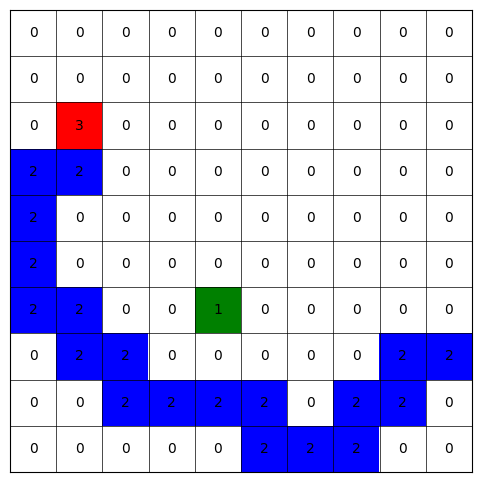

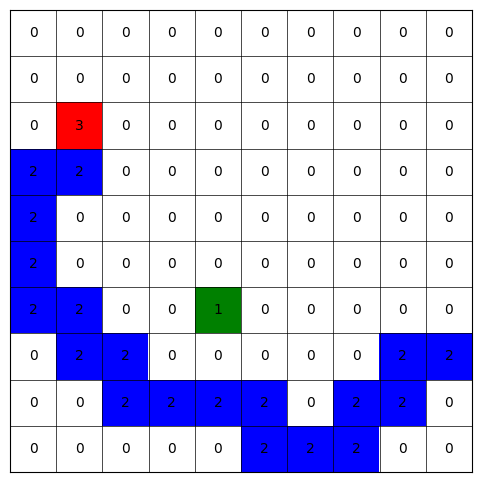

In [130]:
watch_agent_play(deeper_256_128_model, env = SnakeEnvCoilReset())